# Binary Classification

### Explore the data

In [1]:
# load the training dataset
import pandas as pd

diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
# Seperate features and labels
feats = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
         'TricepsThickness','SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'
X, y = diabetes[feats].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n Features:", list(X[n]), "\n Label:", y[n])

Patient 1 
 Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Label: 0
Patient 2 
 Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Label: 0
Patient 3 
 Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Label: 0
Patient 4 
 Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Label: 1


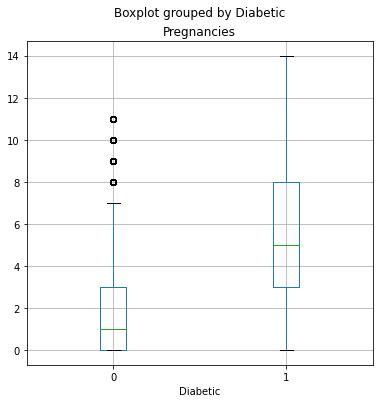

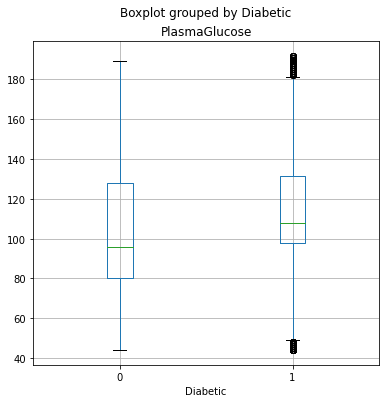

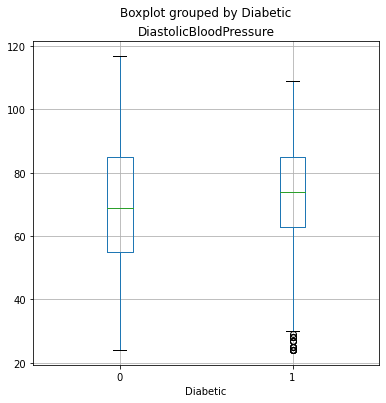

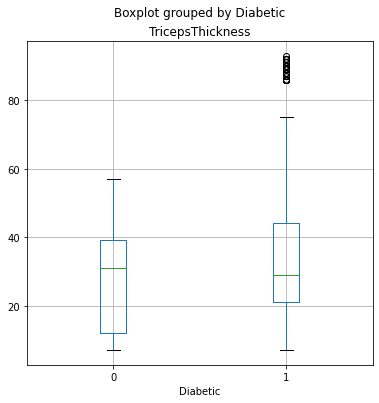

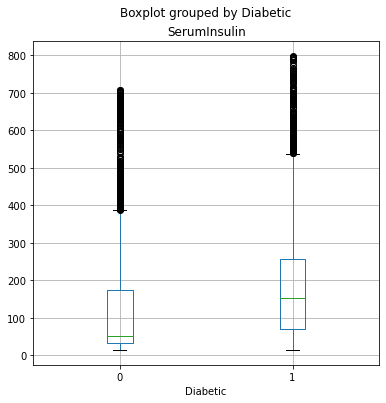

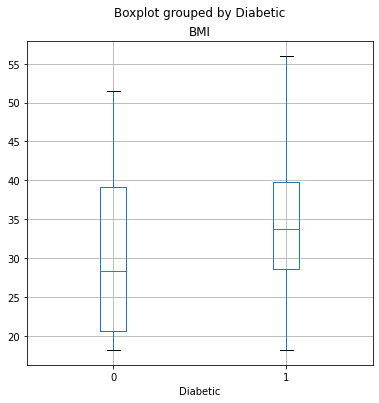

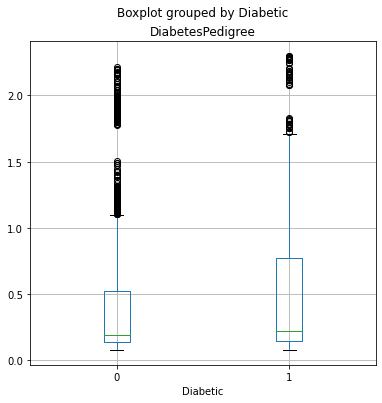

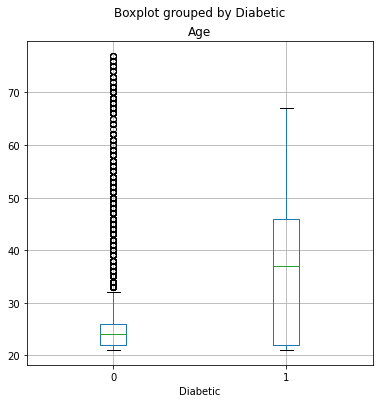

In [3]:
# Compare the feature distributions for each label value
from matplotlib import pyplot as plt
%matplotlib inline

for col in feats:
    diabetes.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

### Split the data

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### Train and Evaluate a Binary Classification Model

#### In addition to the training features and labels, we'll need to  set a regularization parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data. 
#### * Parameters for machine learning algorithms are generally referred to as hyperparameters (parameters are values in the data itself - hyperparameters are defined externally from the data)

In [5]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# Train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [6]:
predict = model.predict(X_test)
print('Predicted Labels: ', predict)
print('Actutal labels: ', y_test)

Predicted Labels:  [0 0 0 ... 0 1 0]
Actutal labels:  [0 0 1 ... 1 1 1]


In [7]:
# Check the accuracy of the predictions, what proportion of the labels did the model predict correctly
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predict))

Accuracy:  0.7891111111111111


#### Accuracy seems like a sensible metric to evaluate, but we need to be careful about drawing too many conclusions from  the accuracy of a classifier. Fortunately, there are some other metrics that reveal a little more about how our model is performing. Scikit-Learn includes the ability to create a classificatioin report providing more insights than raw accuracy alone.

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



#### * Precision: Of the predictions the model made for this class, what porportion were correct
#### * Recall: Out of all of the instances of this class in the test dataset, how many did the model identify
#### * F1-Score: An average metric that takes both precision and recall into account
#### * Support: How many instances of this class are there in the test dataset

#### https://www.cnblogs.com/178mz/p/8558435.html

#### * Of all the patients the model predicted are diabetic, how many are actually diabetic?
#### * Of all the patients that are actually diabetic, how many did the model identify?

In [9]:
from sklearn.metrics import precision_score, recall_score
print("Overall Precision: ", precision_score(y_test, predict))
print("Overall Recall: ", recall_score(y_test, predict))

Overall Precision:  0.7240285487708168
Overall Recall:  0.6030383091149274


#### The precision and recall metrics are derived from four possible prediction outcomes:
#### * True Positives: The predicted lable and the actual label are both 1.
#### * False Positives: The predicted label is 1, but the actual label is 0.
#### * False Negatives: The predicted label is 0, but the actual label is 1.
#### * True Negatives: The predicted label and the actual label are both 0.

#### These metrics are generally tabulated for the test set and shown together as a confusion matrix, taking the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

* using sklearn.metrics.confusion_matrix function

In [10]:
from sklearn.metrics import confusion_matrix

# print the confusion matrix
cm = confusion_matrix(y_test, predict)
print(cm)

[[2638  348]
 [ 601  913]]


Statistical machine learning algorithms are based on probability. So what actually gets predicted by a binart classifier is the probability that the label is true (P(y)) and the probability that the label is false (1-P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5).
* using the predict_proba method to see the probability pairs for each case

In [11]:
y_scores = model.predict_proba(X_test)
print(y_scores)
print('test \n',y_scores[:,1])
# 取第1欄所有值

[[0.81646773 0.18353227]
 [0.9627432  0.0372568 ]
 [0.80809022 0.19190978]
 ...
 [0.60685388 0.39314612]
 [0.10780629 0.89219371]
 [0.63968655 0.36031345]]
test 
 [0.18353227 0.0372568  0.19190978 ... 0.39314612 0.89219371 0.36031345]


A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a receiver operating characteristic curve (ROC) chart.
https://zh.wikipedia.org/wiki/ROC%E6%9B%B2%E7%BA%BF

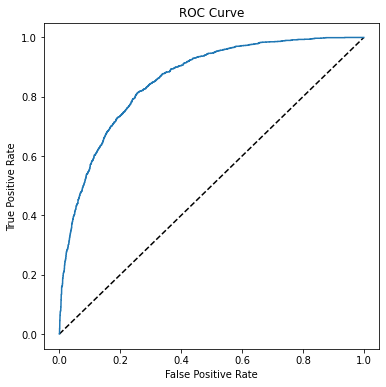

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize = (6,6))
# plot the diagonal 50% line
plt.plot([0 ,1], [0, 1], 'k--')
# plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different thrshold values between 0 and 1. A perfect classifier would have a curve going straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction. 

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model.Scikit-Learn includes a function to calculate this metric.

In [13]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568559928720644


### Perform preprocessing in a pipeline

* Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
* Encoding categorical variables by using a one hot encoding technique (creating individual binary (true/false) features for each possible category value.

using piplines to define a set of preprocessing steps that end with an algorithm

In [14]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns 
# (normalize them so they're on the same scale)
# feats = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
#          'TricepsThickness','SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
numeric_feats = [0,1,2,3,4,5,6]
numeric_transf = Pipeline(steps = [('scaler', StandardScaler())])

# Define preprocessing for categorical features
# (encode the Age column)
cate_feats = [7]
cate_transf = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
                transformers = [
                    ('num', numeric_transf, numeric_feats),
                    ('cat', cate_transf, cate_feats)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                             ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])

# fir the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC0.9202411783390743


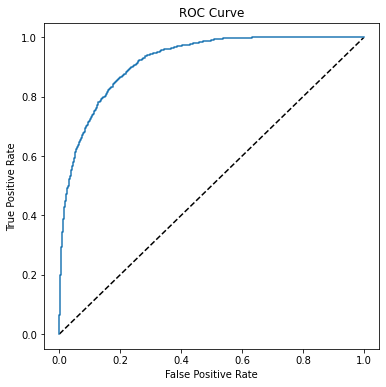

In [15]:
predict = model.predict(X_test)
y_scores = model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# get evaluation metrics
cm = confusion_matrix(y_test, predict)
print('Confusion Matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, predict))
print('Overall Precision:', precision_score(y_test, predict))
print('Overall Recall:', recall_score(y_test, predict))
auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6,6))
# plot the diagonal 50% line
plt.plot([0,1],[0,1],'k--')
# plot the FPR and TPR achieved by the model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Try a different algorithm

A logistic regression algorithm is a linear one. There are many kinds of classification algorithm.
* Support Vector Machine algorithms: Algorithms that define a hyperplane that seperates classes
* Tree-based algorithms: algorithms that build a decision tree to reach a prediction
* Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability. e.p. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier(n_estimators=100))])

model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('regressor', RandomForestClassifier())])


Confusion Matrix:
 [[2858  128]
 [ 175 1339]] 

Accuracy: 0.9326666666666666
Overall Precision: 0.912747102931152
Overall Recall: 0.8844121532364597
AUC0.9823272586026732


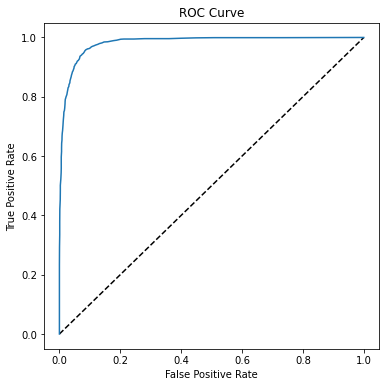

In [17]:
predict = model.predict(X_test)
y_scores = model.predict_proba(X_test)

cm = confusion_matrix(y_test, predict)
print('Confusion Matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, predict))
print('Overall Precision:', precision_score(y_test, predict))
print('Overall Recall:', recall_score(y_test, predict))
auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC' + str(auc))

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Use the Model for Inferencing

In [18]:
import joblib

# save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [19]:
# load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays
X_new =  np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print('New sample: {}'.format(list(X_new[0])))
pred = model.predict(X_new)
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


# Multiclass Classification

Multiclass classification can be thought of as a combination of multiple binary classifiers.
* One vs Rest (OVR), in which a classifier is created for each possible class value, with a positive outcome for cases where the prediction is the class, and negative predictions for cases where the prediction is any other class. 
* One vs One (OVO), in which a classifier for each possible pair of classes is created.

In both approaches, the overall model that combines the classifiers generates a vector of predictions in which the probabilities generated from the individual binary classifiers are used to determine which class to predict.

In most cases, the estimators used for binary classification implicitly support multiclass classification by abstracting an OVR algorithm, an OVO algorithm, or by allowing a choice of either

### Explore the data

In [20]:
import pandas as pd
penguins = pd.read_csv('data/penguins.csv')

# display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
120,36.2,17.2,187.0,3150.0,0
220,43.5,14.2,220.0,4700.0,1
196,50.5,15.9,222.0,5550.0,1
20,37.8,18.3,174.0,3400.0,0
215,54.3,15.7,231.0,5650.0,1
77,37.2,19.4,184.0,3900.0,0
51,40.1,18.9,188.0,4300.0,0
301,52.0,19.0,197.0,4150.0,2
122,40.2,17.0,176.0,3450.0,0
159,46.7,15.3,219.0,5200.0,1


In [21]:
penguin_classes = ['Amelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[', row[0], row[1], row[2], row[3], int(row[4]), ']', penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 37.8 20.0 190.0 4250.0 0 ] Amelie
[ 51.7 20.3 194.0 3775.0 2 ] Chinstrap
[ 46.5 14.5 213.0 4400.0 1 ] Gentoo
[ 46.2 14.4 214.0 4650.0 1 ] Gentoo
[ 40.2 20.1 200.0 3975.0 0 ] Amelie
[ 41.3 21.1 195.0 4400.0 0 ] Amelie
[ 44.5 14.7 214.0 4850.0 1 ] Gentoo
[ 35.6 17.5 191.0 3175.0 0 ] Amelie
[ 53.5 19.9 205.0 4500.0 2 ] Chinstrap
[ 55.8 19.8 207.0 4000.0 2 ] Chinstrap


In [22]:
# count the number of null values for each column
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [23]:
# show rows containing nulls
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [24]:
# NaN standing for "not a number"
# drop rows containing NaN values
penguins = penguins.dropna()
# confirm there are now no nulls
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

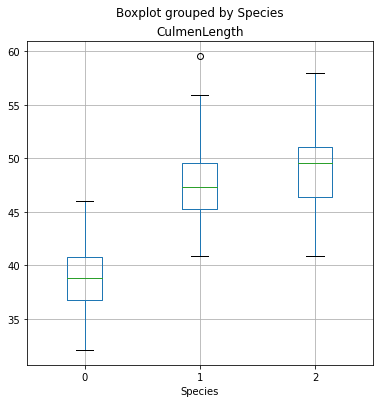

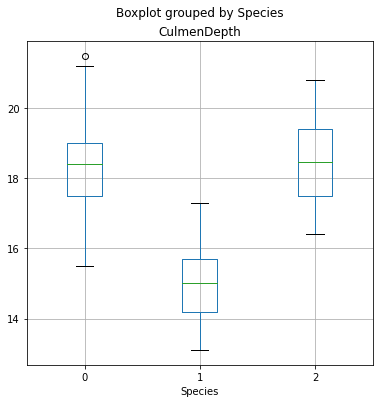

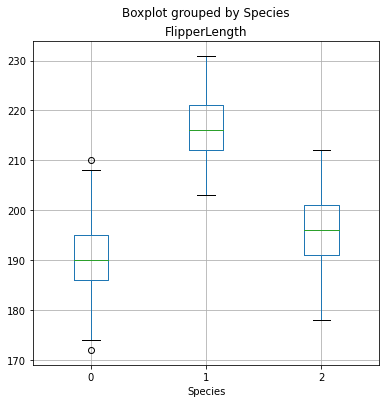

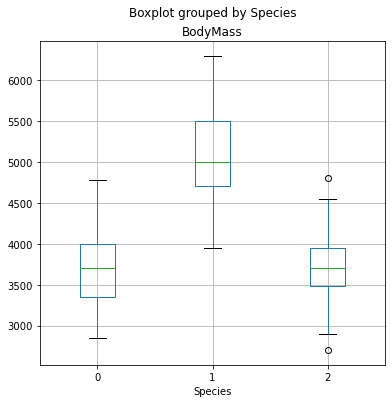

In [25]:
# how the features relate to the label by creating some box charts
from matplotlib import pyplot as plt
%matplotlib inline

feats = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
for col in feats:
    penguins.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

### Prepare the data

In [26]:
from sklearn.model_selection import train_test_split

# separate features and labels
X, y = penguins[feats].values, penguins[label].values

# split data 70-30 into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print('Training Set: %d, Test Set: %d \n'%(X_train.shape[0], X_test.shape[0]))

Training Set: 239, Test Set: 103 



### Train and evaluate a multiclass classifier

In [28]:
from sklearn.linear_model import LogisticRegression

# set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print(multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [29]:
predict = multi_model.predict(X_test)
print('Predicted labels:', predict[:15])
print('Actual labels:',y_test[:15])

Predicted labels: [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels: [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



With multiclass results we must specify which average metric we want to use for precision and recall

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:", accuracy_score(y_test, predict))
print("Overall Precision:", precision_score(y_test, predict, average='macro'))
print("Overall Recall:", recall_score(y_test, predict, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


In [35]:
from sklearn.metrics import confusion_matrix

mcm = confusion_matrix(y_test, predict)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map.
https://www.it145.com/9/23373.html
https://www.itread01.com/content/1536994702.html

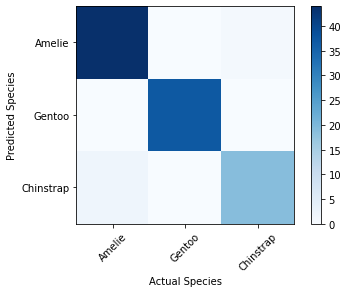

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow(): 首先將二維陣列的值標準化爲0到1之間的值，然後根據指定的漸變色依次賦予每個單元格對應的顏色，就形成了熱圖
# cmap: 是colormap的簡稱，用於指定漸變色
# interpolation: 控制熱圖的顯示形式(類似模糊程度)
# plt.colorbar(): 圖例
# np.arange([start,] stop[, step]):生成一個從start(包含)到stop(不包含），以 step為步長的序列。返回一個 ndarray對象
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Actual Species")
plt.ylabel("Predicted Species")
plt.show()

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, we can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

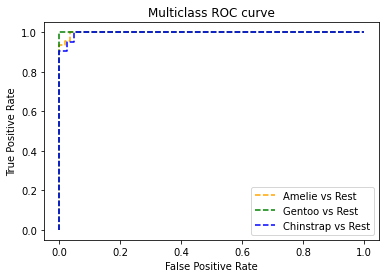

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# get class probability scores
proba = multi_model.predict_proba(X_test)

# get ROC metrics for each class
fpr = {}
tpr = {}
thre = {}
for i in range(len(penguin_classes)):
    fpr[i], tpr[i], thre[i] = roc_curve(y_test, proba[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label=penguin_classes[0]+' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label=penguin_classes[1]+' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label=penguin_classes[2]+' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, we can calculate an aggregate area under the curve score that is averaged acrocss all of the OVR curves

In [40]:
auc = roc_auc_score(y_test, proba, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


### Preprocess data in a pipeline

SVM:支援向量機(Support Vector Machine)，除了能得到一條很好的線之外，還可以做非線性的分類
https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# define preprocessing for nunmeric columns (scale them)
numer_col = [0, 1, 2, 3]
numer_trans = Pipeline(steps =[('scaler', StandardScaler())])

# create preprocessing steps
preprocessor = ColumnTransformer(
                transformers=[('preprocess', numer_trans, numer_col)])

# create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])

# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


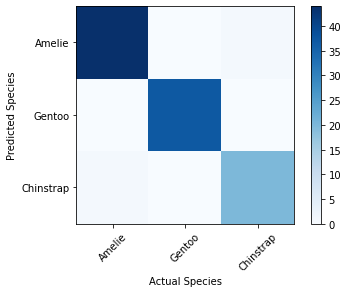

In [48]:
predict = multi_model.predict(X_test)
proba = multi_model.predict_proba(X_test)

print("Overall Accuracy:", accuracy_score(y_test, predict))
print("Overall Precision:", precision_score(y_test, predict, average='macro'))
print("Overall Recall:", recall_score(y_test, predict, average='macro'))
print("Average AUC:", roc_auc_score(y_test, proba, multi_class='ovr'))

mcm = confusion_matrix(y_test, predict)
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('Actual Species')
plt.ylabel('Predicted Species')
plt.show()

### Use the model with new data observations

In [49]:
import joblib

filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [50]:
multi_model = joblib.load(filename)

X_new = np.array([[50.4,15.3,224,5550]])
print('New sample: {}'.format(X_new[0]))

predict = multi_model.predict(X_new)[0]
print('Predicted class is', penguin_classes[predict])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


In [52]:
X_new = np.array([[49.5,18.4,195, 3600],
                  [38.2,20.1,190,3900]])
print('New samples:\n{}'.format(X_new))

predict = multi_model.predict(X_new)
for pred in predict:
    print(pred,'('+penguin_classes[pred]+')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Amelie)
